In [2]:
import neural_net_without_autograd as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [17]:
np.random.seed(42)

# --- defining the Franke function
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

# --- Generating dataset
n = 100 # the square root of the number of datapoints
x, y = np.linspace(0,1,n), np.linspace(0,1,n)
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()

k = .01 # noise coefficient
z = FrankeFunction(x,y) + k*np.random.randn(n**2) # target variable with standard normal noise
z = z.reshape((len(z), 1))      # have to reshape the data to get the correct output

X = np.column_stack((x,y))

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

### Gridsearch

Gridsearch checking different activation function:

In [15]:
# Define layer sizes and activations
network_input_size =  2
layer_output_sizes = [50, 1]
activations = ['sigmoid', 'identity']

k_folds = KFold(n_splits=5)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, loss_fn='mse', batch_size=512, epochs=500))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.001, 0.1, 10],
    'model__activations': [['sigmoid', 'identity'], ['relu', 'identity'], ['elu', 'identity']]
}

grid_search = GridSearchCV(estimator=pipeline,
                param_grid=param_grid,
                scoring='neg_mean_squared_error',
                cv=k_folds,
                verbose=3,
                n_jobs=1)
gs = grid_search.fit(X_train, z_train)
print(-gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Epoch 0: MSE = 5.2070136476779325
Epoch 100: MSE = 1.2341701035325776
Epoch 200: MSE = 0.3359794605046821
[CV 1/5] END model__activations=['sigmoid', 'identity'], model__epsilon=0.0001, model__llambda=0;, score=-0.117 total time=   1.4s
Epoch 0: MSE = 21.07928999641459
Epoch 100: MSE = 1.3940735324483748
Epoch 200: MSE = 0.46975754883489784
[CV 2/5] END model__activations=['sigmoid', 'identity'], model__epsilon=0.0001, model__llambda=0;, score=-0.195 total time=   1.5s
Epoch 0: MSE = 4.627848260650702
Epoch 100: MSE = 1.1453318693912644
Epoch 200: MSE = 0.34229305658339454
[CV 3/5] END model__activations=['sigmoid', 'identity'], model__epsilon=0.0001, model__llambda=0;, score=-0.141 total time=   1.5s
Epoch 0: MSE = 9.924657128971413
Epoch 100: MSE = 1.0796468850275895
Epoch 200: MSE = 0.34184393629723003
[CV 4/5] END model__activations=['sigmoid', 'identity'], model__epsilon=0.0001, model__llambda=0;, score=-0.145 total tim

In [16]:
cv_results = grid_search.cv_results_

results_df = pd.DataFrame(cv_results)

# save data to csv-file
results_df.to_csv('Results/gridsearch_regression_300_epochs_diff_lambda.csv', sep=',', encoding='utf-8')

### Batch Size

In [12]:
# Define layer sizes and activations
network_input_size =  2
layer_output_sizes = [50, 1]
activations = ['sigmoid', 'identity']

N = 100
learning_rates = np.logspace(-4, -1, N)
batch_sizes = [32, 64, 128, 256, 512]
scores = np.zeros((len(batch_sizes), N))

for idy, batch_size in enumerate(batch_sizes):  
    for idx, lr in enumerate(learning_rates):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', NNC.NeuralNet(network_input_size, 
                                    layer_output_sizes, 
                                    activations, 
                                    epochs=10, 
                                    epsilon=lr, 
                                    batch_size=batch_size,
                                    loss_fn='mse'))
        ])

        pipeline.fit(X_train, z_train)
        score = pipeline.score(X_test, z_test)

        scores[idy, idx] = score

Epoch 0: MSE = 2.530834159014872
Epoch 0: MSE = 1.1336648643064466
Epoch 0: MSE = 3.6838155788059375
Epoch 0: MSE = 5.230608092785308
Epoch 0: MSE = 3.4660721628067166
Epoch 0: MSE = 1.538573884859442
Epoch 0: MSE = 0.822956873946993
Epoch 0: MSE = 0.4571249359841304
Epoch 0: MSE = 0.9138312197139664
Epoch 0: MSE = 1.7188449826853607
Epoch 0: MSE = 1.2992940060839273
Epoch 0: MSE = 2.3059593411434327
Epoch 0: MSE = 0.8454838395918762
Epoch 0: MSE = 3.0513688934873704
Epoch 0: MSE = 1.8079342840092822
Epoch 0: MSE = 2.114085662083381
Epoch 0: MSE = 1.072978910926292
Epoch 0: MSE = 0.3427868776080909
Epoch 0: MSE = 0.44224474800207336
Epoch 0: MSE = 0.790875600139229
Epoch 0: MSE = 0.9825507726398112
Epoch 0: MSE = 0.7586804102820723
Epoch 0: MSE = 1.4659467645930186
Epoch 0: MSE = 0.40356235188679307
Epoch 0: MSE = 0.4009473222108124
Epoch 0: MSE = 1.937225948420582
Epoch 0: MSE = 0.3018195468255407
Epoch 0: MSE = 0.3729890466021517
Epoch 0: MSE = 1.0351018221893165
Epoch 0: MSE = 0.250

In [14]:
np.save('Results/regression_own_code_scores_batch_size.npy', scores)
np.save('Results/learning_rates_regression.npy', learning_rates)

### Learning rate

In [26]:
N = 200
learning_rates = np.logspace(-4, -1, N)
scores = np.zeros(N)
network_input_size = 2
layer_output_sizes = [50, 1]
activations = ['sigmoid', 'identity']

for idx, lr in enumerate(learning_rates):
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epochs=10, epsilon=lr, batch_size=32, loss_fn='mse'))
    ])

    pipeline.fit(X_train, z_train)
    score = pipeline.score(X_test, z_test)

    scores[idx] = score

Epoch 0: MSE = 1.153283431410393
Epoch 0: MSE = 4.230513006580317
Epoch 0: MSE = 1.1890327394182358
Epoch 0: MSE = 0.10347600633340268
Epoch 0: MSE = 4.4997911558190715
Epoch 0: MSE = 1.1425896968748843
Epoch 0: MSE = 3.028897858607365
Epoch 0: MSE = 1.129251204508863
Epoch 0: MSE = 2.4184886508750116
Epoch 0: MSE = 4.611680132625431
Epoch 0: MSE = 2.0690352164272645
Epoch 0: MSE = 0.7906098192348405
Epoch 0: MSE = 0.07636169263239083
Epoch 0: MSE = 0.37370062351078887
Epoch 0: MSE = 0.09132193718144094
Epoch 0: MSE = 0.9915070283872128
Epoch 0: MSE = 0.4179864747086237
Epoch 0: MSE = 0.10142120661733627
Epoch 0: MSE = 0.24889318535389104
Epoch 0: MSE = 0.399515975950929
Epoch 0: MSE = 0.25404641409745005
Epoch 0: MSE = 0.2918436337965783
Epoch 0: MSE = 0.4788901617536885
Epoch 0: MSE = 0.16903204971549385
Epoch 0: MSE = 0.3834568317713704
Epoch 0: MSE = 0.7955210944565686
Epoch 0: MSE = 0.14803037885714385
Epoch 0: MSE = 0.3399318171830362
Epoch 0: MSE = 1.4798006737904006
Epoch 0: MS

In [27]:
np.save('Results/regression_own_code_learning_rate.npy', scores)
np.save('Results/learning_rates_regression_comparison.npy', learning_rates)

### Plotting the prediction and the data

In [22]:
# Define layer sizes and activations
network_input_size =  2
layer_output_sizes = [50, 1]
activations = ['sigmoid', 'identity']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, loss_fn='mse', batch_size=32, epochs=500))
])

pipeline.fit(X_train, z_train)
pipeline.score(X_test, z_test)

Epoch 0: MSE = 0.06026451590591411
Epoch 100: MSE = 0.0029031173112695104
Epoch 200: MSE = 0.002108448840419329
Epoch 300: MSE = 0.0017307484209990167
Epoch 400: MSE = 0.0014807410451557115


0.0012855439876234246

In [23]:
z_total = pipeline.predict(X)

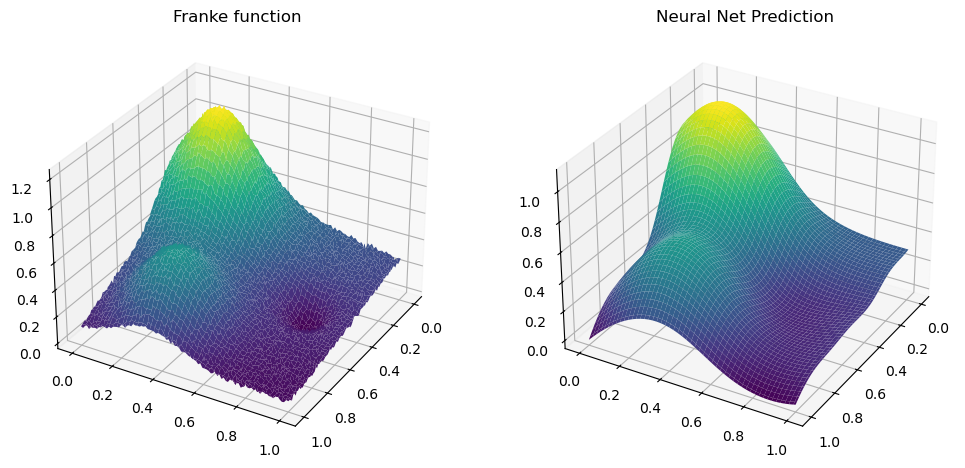

In [24]:
# Reshaping for plotting
x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_plot = z_total.reshape((n,n))
z_orig_plot = z.reshape((n,n))

fig = plt.figure(figsize=(12, 6))

# Plotting the datapoints
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_plot, y_plot, z_orig_plot, cmap='viridis', edgecolor='none')
ax.set_title('Franke function')
ax.view_init(azim=30)

# Plot the polynomial regression prediction 
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x_plot, y_plot, z_plot, cmap='viridis', edgecolor='none')
ax.set_title('Neural Net Prediction')
ax.view_init(azim=30)

plt.show()